In [ ]:
from zipfile import ZipFile
import os

zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [ ]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['glamorous two-piece outfit featuring a sequined design.jpeg',
  'white dress adorned with colorful floral patterns.jpg',
  'black floral saree.jpg',
  'long, elegant blue dress with an off-the-shoulder design with sheer sleeves.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'sparkling black dress.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg',
  'burnt orange long-sleeve top, a plaid skirt with brown tones, and a matching burnt orange beret.jpeg',
  'strapless red midi dress with a mermaid silhouette.jpg',
  'long, flowing dress with a full skirt.jpg'],
 97)

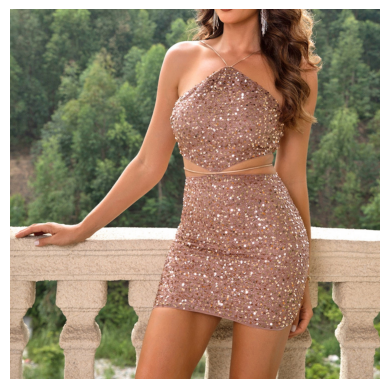

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [ ]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/glamorous two-piece outfit featuring a sequined design.jpeg', '/content/women_fashion/women fashion/white dress adorned with colorful floral patterns.jpg', '/content/women_fashion/women fashion/black floral saree.jpg', '/content/women_fashion/women fashion/long, elegant blue dress with an off-the-shoulder design with sheer sleeves.jpg', '/content/women_fashion/women fashion/ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', '/content/women_fashion/women fashion/sparkling black dress.jpg', '/content/women_fashion/women fashion/black and white gingham checkered A-line dress with a flared skirt.jpg', '/content/women_fashion/women fashion/burnt orange long-sleeve top, a plaid skirt with brown tones, and a matching burnt orange beret.jpeg', '/content/women_fashion/women fashion/strapless red midi dress with a mermaid silhouette.jpg', '/content/women_fashion/women fashion/long, flowing dress with a full skirt.jpg', '/c

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━

In [ ]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


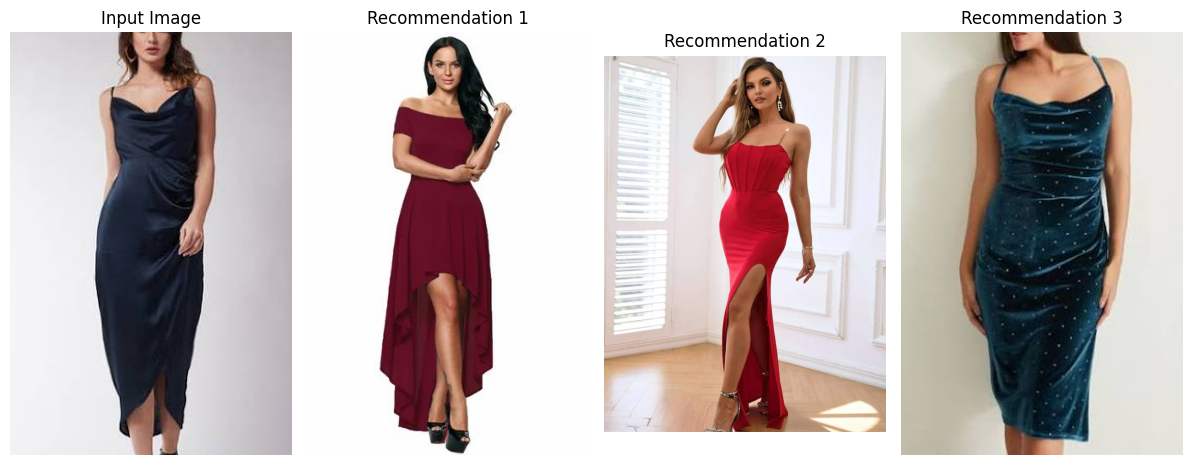

In [ ]:
input_image_path = '/content/women_fashion/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


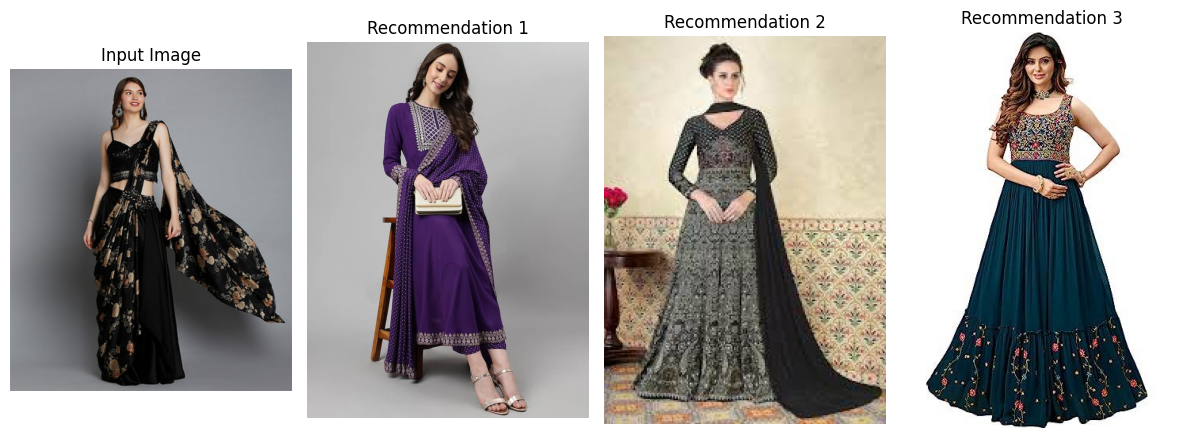

In [ ]:
input_image_path = '/content/women_fashion/women fashion/black floral saree.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


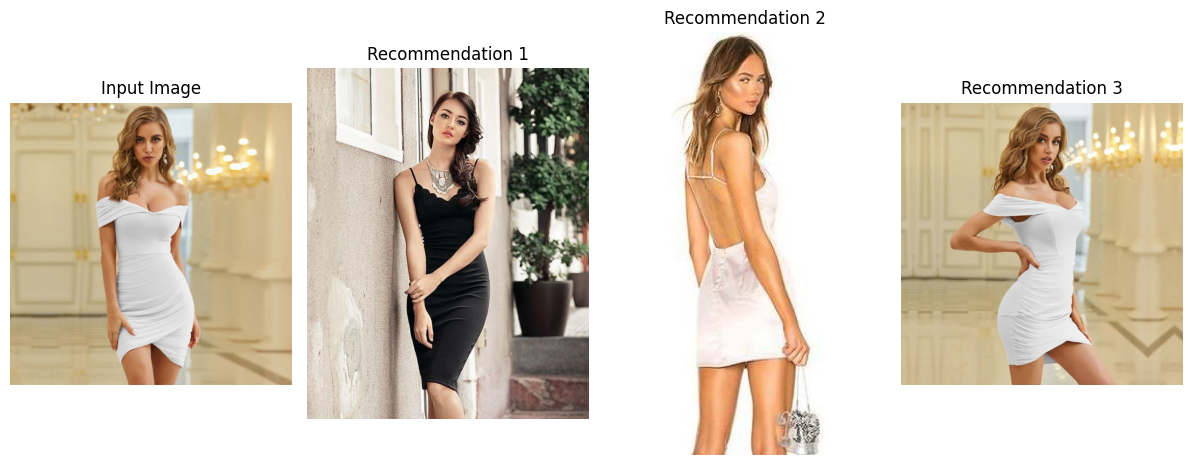

In [ ]:
input_image_path = '/content/women_fashion/women fashion/tight-fitting, off-the-shoulder white dress 2.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step


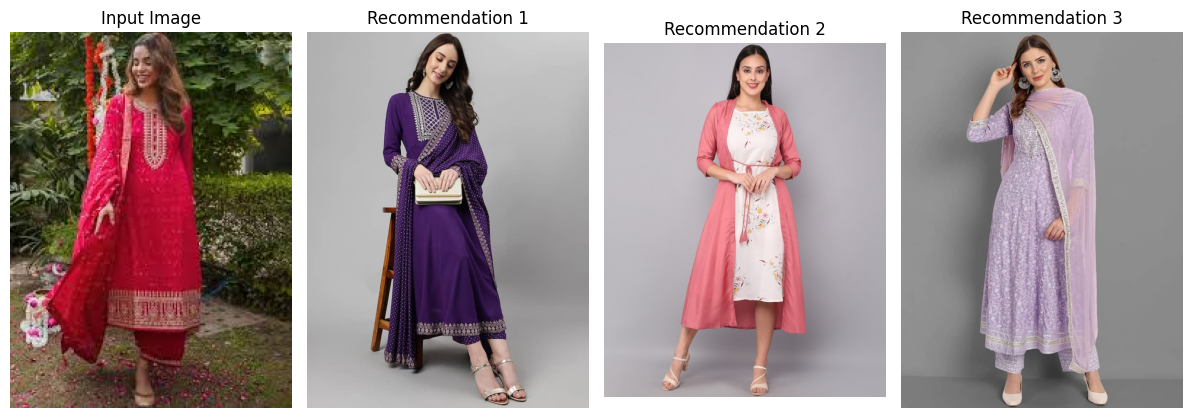

In [ ]:
input_image_path = '/content/women_fashion/women fashion/salwar kameez in a vibrant red color with detailed embroidery.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

['women fashion', '__MACOSX']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/

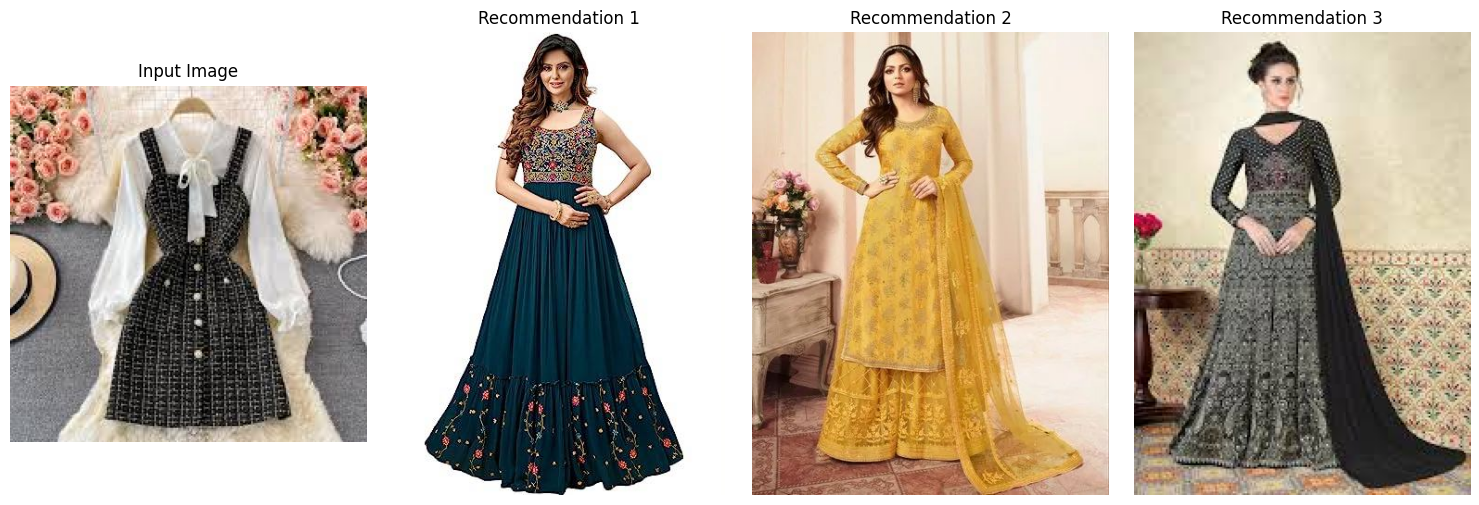

In [8]:
from IPython import get_ipython
from IPython.display import display
from zipfile import ZipFile
import os
import requests
import tempfile
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from scipy.spatial.distance import cosine


def preprocess_image(img_path):
    """Preprocesses an image for feature extraction."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)


def extract_features(model, preprocessed_img):
    """Extracts features from a preprocessed image using the model."""
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features


def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=3):
    """Recommends similar fashion items based on input image."""
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]
    similar_image_paths = [os.path.join('/content/women_fashion/women fashion', all_image_names[idx]) for idx in
                           similar_indices]
    return similar_image_paths


# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Dataset preparation (unzip and extract features)
zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

image_directory = '/content/women_fashion/women fashion'
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if
                    file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

# Example usage with a local image path
input_image_path = '/content/images.jpg'  # Replace with the actual path

recommendations = recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model)

# Display input image and recommendations
num_recommendations = len(recommendations)
fig, axes = plt.subplots(1, num_recommendations + 1, figsize=(15, 5))  # +1 for input image

# Display input image
input_image = Image.open(input_image_path)
axes[0].imshow(input_image)
axes[0].set_title("Input Image")
axes[0].axis('off')

# Display recommendations
for i, image_path in enumerate(recommendations):
    recommended_image = Image.open(image_path)
    axes[i + 1].imshow(recommended_image)
    axes[i + 1].set_title(f"Recommendation {i + 1}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

['women fashion', '__MACOSX']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/

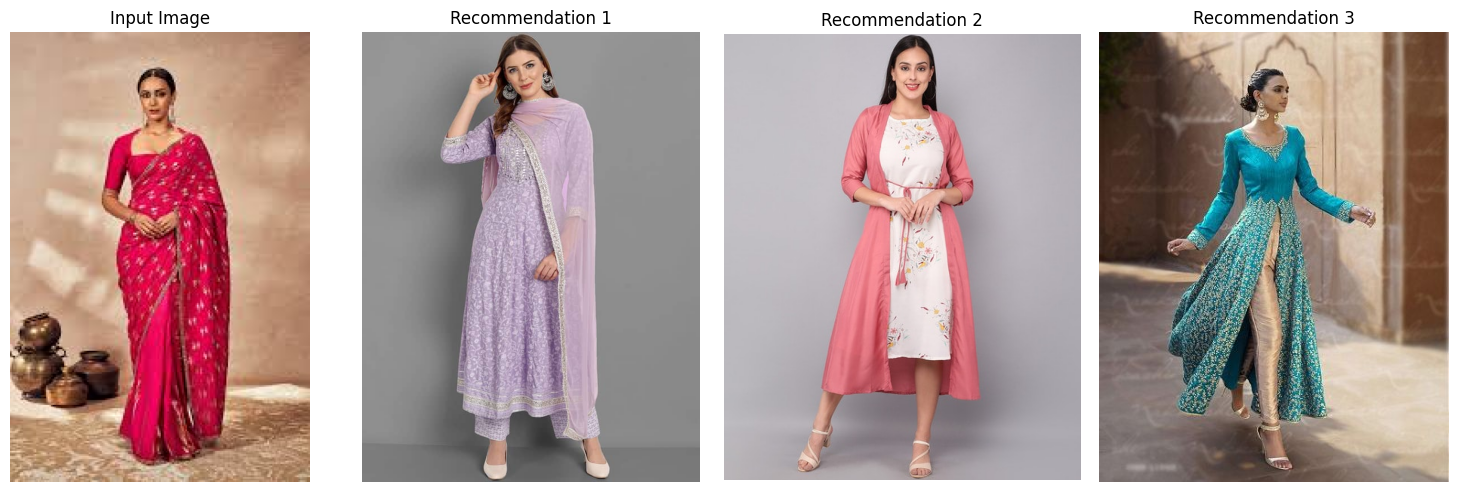

In [9]:
from IPython import get_ipython
from IPython.display import display
from zipfile import ZipFile
import os
import requests
import tempfile
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from scipy.spatial.distance import cosine


def preprocess_image(img_path):
    """Preprocesses an image for feature extraction."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)


def extract_features(model, preprocessed_img):
    """Extracts features from a preprocessed image using the model."""
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features


def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=3):
    """Recommends similar fashion items based on input image."""
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]
    similar_image_paths = [os.path.join('/content/women_fashion/women fashion', all_image_names[idx]) for idx in
                           similar_indices]
    return similar_image_paths


# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Dataset preparation (unzip and extract features)
zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

image_directory = '/content/women_fashion/women fashion'
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if
                    file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

# Example usage with a local image path
input_image_path = '/content/download.jpg'

recommendations = recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model)

# Display input image and recommendations
num_recommendations = len(recommendations)
fig, axes = plt.subplots(1, num_recommendations + 1, figsize=(15, 5))  # +1 for input image

# Display input image
input_image = Image.open(input_image_path)
axes[0].imshow(input_image)
axes[0].set_title("Input Image")
axes[0].axis('off')

# Display recommendations
for i, image_path in enumerate(recommendations):
    recommended_image = Image.open(image_path)
    axes[i + 1].imshow(recommended_image)
    axes[i + 1].set_title(f"Recommendation {i + 1}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

['women fashion', '__MACOSX']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/

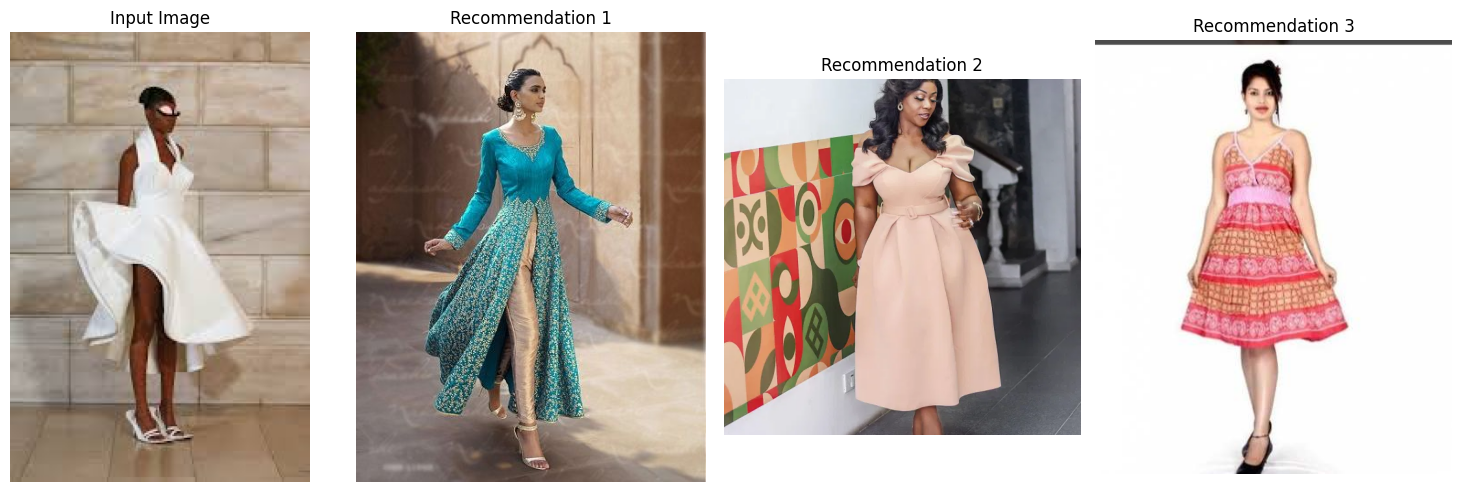

In [10]:
from IPython import get_ipython
from IPython.display import display
from zipfile import ZipFile
import os
import requests
import tempfile
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from scipy.spatial.distance import cosine


def preprocess_image(img_path):
    """Preprocesses an image for feature extraction."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)


def extract_features(model, preprocessed_img):
    """Extracts features from a preprocessed image using the model."""
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features


def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=3):
    """Recommends similar fashion items based on input image."""
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]
    similar_image_paths = [os.path.join('/content/women_fashion/women fashion', all_image_names[idx]) for idx in
                           similar_indices]
    return similar_image_paths


# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Dataset preparation (unzip and extract features)
zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

image_directory = '/content/women_fashion/women fashion'
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if
                    file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

# Example usage with a local image path
input_image_path = '/content/images (1).jpg'

recommendations = recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model)

# Display input image and recommendations
num_recommendations = len(recommendations)
fig, axes = plt.subplots(1, num_recommendations + 1, figsize=(15, 5))  # +1 for input image

# Display input image
input_image = Image.open(input_image_path)
axes[0].imshow(input_image)
axes[0].set_title("Input Image")
axes[0].axis('off')

# Display recommendations
for i, image_path in enumerate(recommendations):
    recommended_image = Image.open(image_path)
    axes[i + 1].imshow(recommended_image)
    axes[i + 1].set_title(f"Recommendation {i + 1}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()